In [1]:
bs = 32

In [2]:
from pathlib import Path
from fastai.vision import *
import numpy as np
path = Path(r'C:\Users\rohit\Documents\Hackathon\Diabetic Retinopathy')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=bs, size=224, num_workers=4).normalize(imagenet_stats)

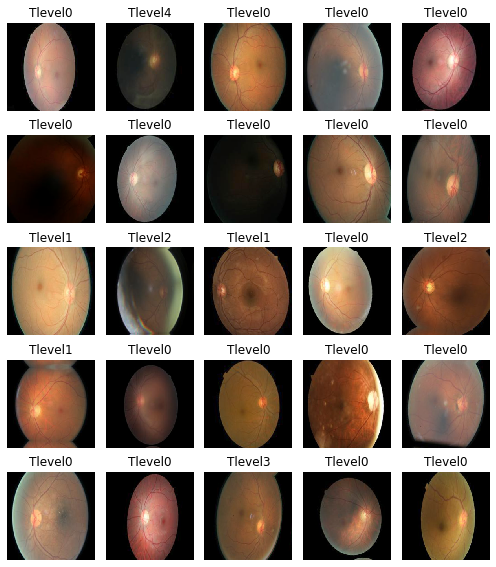

In [3]:
data.show_batch(rows=5, figsize=(7, 8))

In [4]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.densenet169, metrics=error_rate)

C:\ProgramData\Anaconda3\lib\site-packages\fastai\vision\learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [5]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

path = Path(r'C:\Users\rohit\Documents\Hackathon\Diabetic Retinopathy')

classes = ['Tlevel0','Tlevel1','Tlevel2','Tlevel3','Tlevel4']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.densenet169)

Tlevel3


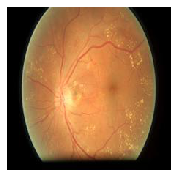

In [6]:
img = open_image(r"C:\Users\rohit\Documents\Hackathon\Diabetic Retinopathy\Tlevel3\13889_right.jpeg")
learn = learn.load(r'C:\Users\rohit\Documents\Hackathon\DiabeticRetinopathy')
img.show()
pred_class, pred_idx, outputs = learn.predict(img)
print(str(pred_class).capitalize())

In [8]:
import pickle
pickle.dump(learn,open('model.pkl','wb'))

In [9]:
def predict_dr(img):
    pred_class, pred_idx, outputs = learn.predict(img)
    print(str(pred_class).capitalize())
    a = img

In [10]:
predict_dr(img)

Tlevel3


In [11]:
# import pandas as pd
# from flask import Flask, jsonify, request
# import pickle
# import os

# # load model
# model = pickle.load(open(r'C:\Users\rohit\Documents\Flight Delay\model.pkl','rb'))

# # app
# app = Flask(__name__)

# # routes
# @app.route('/', methods=['POST'])

# def predict():
#     # get data
#     data = request.get_json(force=True)

#     # convert data into dataframe
#     data.update((x, [y]) for x, y in data.items())
#     data_df = pd.DataFrame.from_dict(data)

#     # predictions
#     result = model.predict(data_df)

#     # send back to browser
#     output = {'results': int(result[0])}

#     # return data
#     return jsonify(results=output)

# if __name__ == '__main__':
#     app.run(port = 5000, debug=True)



from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


app = Flask(__name__)
# app = Flask(__name__) = pickle.load(open('model.pkl','rb'))


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction, indx, outputs = model.predict(data)

    return jsonify(prediction)

if __name__ == '__main__':
    modelfile = 'DiabeticRetinopathy.pth'
    model = p.load(open(modelfile, 'rb'))
    app.run(debug=True, port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
import json, requests, datetime
from flask import Flask, request, abort, jsonify
url = 'http://127.0.0.1:5000/api'
# date_time = datetime.datetime.strptime('1/10/2018 21:45:00', '%d/%m/%Y %H:%M:%S').timestamp()
j_data = json.dumps({"url":r'C:\Users\rohit\Documents\Hackathon\Diabetic Retinopathy\Tlevel3\13889_right.jpeg'})
r = requests.post(url, data=j_data)

print(r, r.text)

<Response [500]> <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
  "http://www.w3.org/TR/html4/loose.dtd">
<html>
  <head>
    <title>flask.debughelpers.FormDataRoutingRedirect: b'A request was sent to this URL (http://127.0.0.1:5000/api) but a redirect was issued automatically by the routing system to &quot;http://127.0.0.1:5000/api/&quot;.  The URL was defined with a trailing slash so Flask will automatically redirect to the URL with the trailing slash if it was accessed without one.  Make sure to directly send your POST-request to this URL since we can\'t make browsers or HTTP clients redirect with form data reliably or without user interaction.\n\nNote: this exception is only raised in debug mode' // Werkzeug Debugger</title>
    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"
        type="text/css">
    <!-- We need to make sure this has a favicon so that the debugger does
         not by accident trigger a request to /favicon.ico w